In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'

In [252]:
sglisting = pd.read_csv('./SG listings (1).csv')

In [3]:
sglisting_summary = pd.read_csv('./SG listings.csv')

In [4]:
sgcalendar = pd.read_csv('./SG calendar.csv')

In [5]:
sgreviews = pd.read_csv('./SG reviews.csv')

In [6]:
sglisting.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20190420034635,2019-04-20,COZICOMFORT LONG TERM STAY ROOM 2,NaN,This is Room No. 2.(available after Jan 15 201...,This is Room No. 2.(available after Jan 15 201...,none,NaN,...,f,f,flexible,t,t,2,0,2,0,0.01


In [7]:
sglisting_summary.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.7958,Private room,81,180,1,2013-10-21,0.01,2,365


In [8]:
sgcalendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,49091,2019-04-20,t,$81.00,$81.00,180,360
1,49091,2019-04-21,t,$81.00,$81.00,180,360
2,49091,2019-04-22,t,$81.00,$81.00,180,360
3,49091,2019-04-23,t,$81.00,$81.00,180,360
4,49091,2019-04-24,t,$81.00,$81.00,180,360


In [9]:
sgreviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,49091,8243238,2013-10-21,8557223,Jared,Fran was absolutely gracious and welcoming. Ma...
1,50646,11909864,2014-04-18,1356099,James,A comfortable room in a smart condo developmen...
2,50646,13823948,2014-06-05,15222393,Welli,Stayed over at Sujatha's house for 3 good nigh...
3,50646,15117222,2014-07-02,5543172,Cyril,It's been a lovely stay at Sujatha's. The room...
4,50646,15426462,2014-07-08,817532,Jake,"We had a great experience. A nice place, an am..."


In [253]:
# Check listings to remove based on the listing name

drop_list = []

for i,listing_name in enumerate(sglisting['name']):
    try: 
        if 'test' in listing_name.lower():
            print(i, listing_name)
            drop_list.append(i)
    except AttributeError:
        print (i, listing_name)
        drop_list.append(i)

print('  ')
print('The list of indices to drop:')
print(drop_list)

1135 nan
1479 nan
4054 [Test] Cozy Modern House with Unique Architecture
4790 test test
7082 Testing
  
The list of indices to drop:
[1135, 1479, 4054, 4790, 7082]


In [254]:
# Drop all the test listings since we only want to study listings that are actually in use or were meant to be used

sglisting = sglisting.drop(drop_list,axis=0)

In [255]:
# Create a column to mark if listings were operational in the last 12 months
## 0 = Not operational, 1 = Operational

    # Create a function to convert values in the column

def operational_label(x):
    x = x.replace('never','0')
    x = x.replace('today','1')
    x = x.replace('yesterday','1')
    x = x.replace('a week ago','1')
    x = [int(i) for i in x.split() if i.isdigit()]
    
    return x

In [256]:
# Create a column to mark if listings were operational in the last 12 months

    # Create a function to convert values in the column

sglisting['Operational'] = sglisting['calendar_updated'].map(lambda x: operational_label(x))

operational_list = []

for list in sglisting['Operational']:
    for value in list:
        if value > 13:
            operational_list.append(0)
        else:
            operational_list.append(1)
            
sglisting['Operational'] = operational_list

In [257]:
operational = sglisting[sglisting['Operational'] == 1]

In [258]:
# Create a column to mark if listings were reviewed before
## 0 = Not reviewed, 1 = Reviewed

sglisting['reviewed'] = [1 if listing_reviews > 0 else 0 for listing_reviews in sglisting['number_of_reviews'].values ]

In [259]:
reviewed = sglisting[sglisting['reviewed'] == 1]

In [260]:
active = sglisting[(sglisting['reviewed'] == 1) & (sglisting['Operational'] == 1)]

# Data Cleaning

In [261]:
# Convert currency to float

    # Create function to convert currency to float
def currency_convert(x):
    try:
        x = float(x.replace('$','').replace(',',''))
    except AttributeError:
        x = np.nan
        
    return x
    
    # Apply the function on the relevant columns 
for column in ['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']:
    operational[column] = operational[column].map(lambda x: currency_convert(x))
    
for column in ['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']:
    reviewed[column] = reviewed[column].map(lambda x: currency_convert(x))
    
for column in ['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']:
    active[column] = active[column].map(lambda x: currency_convert(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

In [262]:
# Guests included vs extra people vs accommodates

people_index = active[active['extra_people'] == 0].index
 
active.loc[people_index,'guests_included'] = active.loc[people_index,'accommodates']

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [263]:
# Extract only year, convert to integer
active['host_since'] = active['host_since'].map(lambda x: int(x[:4]))

# Calculate number of years as host
active['host_since'] = 2019 - active['host_since']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [264]:
# Create function to clean true & false

def truefalse_label(x):
    if x == 't':
        x=1
    elif x == 'f':
        x=0
    return x

In [265]:
# Convert true/false to 1/0
active['host_is_superhost'] = active['host_is_superhost'].map(lambda x: truefalse_label(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [266]:
# Convert true/false to 1/0
active['host_identity_verified'] = active['host_identity_verified'].map(lambda x: truefalse_label(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [267]:
# Reclassify some properties that do not belong to clear categories eto Other
active['property_type'] = active['property_type'].map(lambda x: x.replace('Villa','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Aparthotel','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Campsite','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Tent','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Guest suite','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Guesthouse','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Cottage','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Cabin','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Boat','Other'))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [268]:
# Checked that the 2 listings with null values have common bathroom
    # Fill na as 0
active['bathrooms'].fillna(0,inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [269]:
# Impute the exact number of beds

active.loc[active[active['beds'].isnull()].index,'beds'] = [2,1,1,1,1,1]

In [270]:
# Reclassify security deposit into a binary - Required/Not required
# Null values = Security deposit not required, because null is likely because hosts did not check that portion

    # Fill null values with 0.0
active['security_deposit'].fillna(0.0, inplace=True)

    # Reassign values to reclassify
active['security_dep_required'] = active['security_deposit'].map(lambda x: 0 if x == 0.0 else 1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [271]:
# Use 20 Apr 2019 to subtract last review date

from datetime import date

active['last_rev_duration'] = '2019-04-20'
active['last_rev_duration'] = pd.to_datetime(active['last_rev_duration']) - pd.to_datetime(active['last_review']) 

# Keep the difference as number of months ago for last review

active['last_rev_duration'] = active['last_rev_duration'].astype('timedelta64[M]')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vi

In [272]:
# Create new feature - review score/no review score

active['review_scores_present'] = active['review_scores_rating'].map(lambda x: 1 if x >0 else 0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [273]:
# Impute null values with the median value

active['review_scores_rating'].fillna(active['review_scores_rating'].median(), inplace=True)
active['review_scores_accuracy'].fillna(active['review_scores_accuracy'].median(), inplace=True)
active['review_scores_accuracy'].fillna(active['review_scores_accuracy'].median(), inplace=True)
active['review_scores_cleanliness'].fillna(active['review_scores_cleanliness'].median(), inplace=True)
active['review_scores_checkin'].fillna(active['review_scores_checkin'].median(), inplace=True)
active['review_scores_communication'].fillna(active['review_scores_communication'].median(), inplace=True)
active['review_scores_location'].fillna(active['review_scores_location'].median(), inplace=True)
active['review_scores_value'].fillna(active['review_scores_value'].median(), inplace=True)

In [274]:
# Convert true/false to 1/0
active['instant_bookable'] = active['instant_bookable'].map(lambda x: truefalse_label(x))
active['require_guest_profile_picture'] = active['require_guest_profile_picture'].map(lambda x: truefalse_label(x))
active['require_guest_phone_verification'] = active['require_guest_phone_verification'].map(lambda x: truefalse_label(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [275]:
active['has_availability'] = active['has_availability'].map(lambda x: truefalse_label(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [276]:
active['cancellation_policy'] = active['cancellation_policy'].map(lambda x: x.replace('super_strict_30','super_strict'))
active['cancellation_policy'] = active['cancellation_policy'].map(lambda x: x.replace('super_strict_60','super_strict'))
active['cancellation_policy'] = active['cancellation_policy'].map(lambda x: x.replace('strict','super_strict'))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [277]:
# Impute null values with 0 for cleaning fee

active['cleaning_fee'].fillna(0, inplace=True)

In [278]:
active['rate'] = active['price'] + active['cleaning_fee']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# NLP techniques - amenities

In [283]:
# Extract each amenity out from text in column amenities

import re

amenities_list = []

for value in active['amenities'].values:
    value = re.sub('[{""}]','',value)
    value = value.split(',')
    amenities_list.append(value)
    
amenities_type = []

for listing in amenities_list:
    for amenity in listing:
        if amenity not in amenities_type:
            amenities_type.append(amenity)
            
amenities_type.remove('translation missing: en.hosting_amenity_50')
amenities_type.remove('translation missing: en.hosting_amenity_49')

In [284]:
for amenity in amenities_type:
    active[amenity] = [1 if amenity in listing else 0 for listing in amenities_list]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Difference between Superhost and Non-Superhost

In [285]:
active1[['host_is_superhost','rate','number_of_reviews_ltm','reviews_per_month']].groupby(by='host_is_superhost').mean()

,rate,number_of_reviews_ltm,reviews_per_month
host_is_superhost,,,
0,148.56368,8.858908,1.10010
1,195.46539,18.195876,1.96218


In [286]:
15.368778/8.489784

1.810267257682881

In [287]:
superhost_multiplier = []

for value in active['host_is_superhost']:
    if value == 1:
        superhost_multiplier.append(1.81)
    else:
        superhost_multiplier.append(1)

In [288]:
active['profitability'] = active['price'] * active['minimum_nights'] * active['number_of_reviews_ltm'] * superhost_multiplier

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [175]:
active1[['profitability','property_type','room_type','number_of_reviews_ltm','minimum_nights','host_is_superhost','price']].groupby(by='property_type').mean().sort_values(by='profitability', ascending=True)

,profitability,number_of_reviews_ltm,minimum_nights,host_is_superhost,price
property_type,,,,,
Hostel,304.982143,6.607143,1.232143,0.000000,49.531250
Bed and breakfast,308.331786,4.910714,1.107143,0.017857,59.678571
Hotel,661.281667,5.500000,1.000000,0.020833,125.791667
Boutique hotel,730.289474,5.868421,1.736842,0.000000,144.026316
House,3302.638837,14.089147,5.930233,0.170543,88.953488
Other,3853.778515,8.930693,4.158416,0.148515,123.188119
Townhouse,4297.593084,18.252336,3.803738,0.214953,96.775701
Bungalow,4452.203500,21.325000,7.275000,0.400000,95.800000
Apartment,7229.296121,10.513274,10.153884,0.161259,120.842675


In [176]:
active1[active1['property_type'] == 'Serviced apartment']['host_name'].value_counts()

Alvin                            70
Darcy                            55
Heritage Apartments              40
Darrick                          20
Angie                            17
Catherine                        17
Oakwood Premier OUE Singapore    15
Abegail                          15
Bob                              14
Anna                             13
Kay                              13
Simon                            10
Xiaoyu                           10
Irene                             9
Jimmy                             9
Lee                               8
Mark                              8
Ong                               8
Kong Wee                          7
Xi                                7
Aaron                             7
Patricia                          7
Amelia                            7
Oakwood Studios                   6
Homes Sg                          6
Chunhong                          6
Mich                              6
Fang                        

In [92]:
active1['calculated_host_listings_count'].describe()

count    4408.000000
mean       29.077359
std        46.922660
min         1.000000
25%         2.000000
50%         9.000000
75%        28.000000
max       229.000000
Name: calculated_host_listings_count, dtype: float64

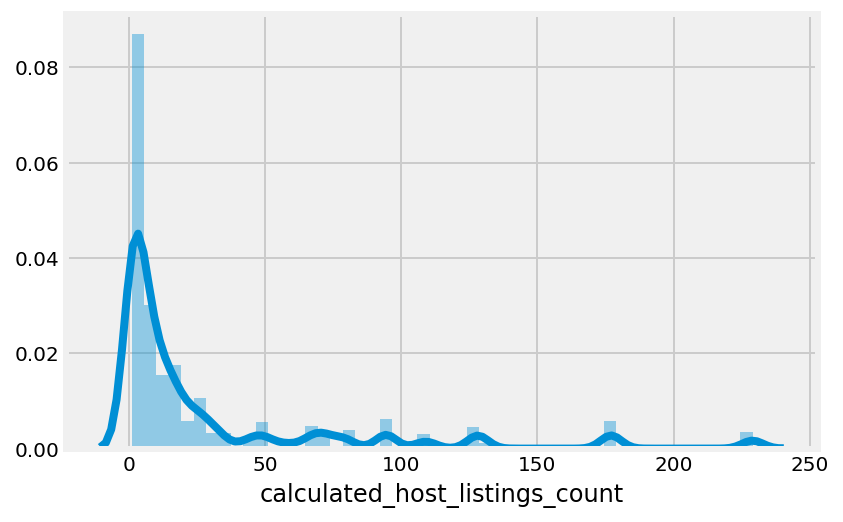

In [93]:
sns.distplot(active1['calculated_host_listings_count'])

In [94]:
active1[active1['host_total_listings_count'] == 3]['host_name']

75            Quinn
207          Darryl
258            Mara
316     泳欣Yong Xing
317           James
351            Cozy
667            Hedy
691              Cj
757            Hedy
1024             Cj
1134           Mara
1176           Mara
1258         Gordon
1364           Xuan
1403           Mich
1671         Darryl
1690             Gc
1702          Steve
1735          Linda
1793          Linda
1837           Qing
1889           Cozy
1907           Mily
1942           John
1994         Jiawen
2106           Qing
2134        Juliana
2158        Juliana
2332           Alex
2366           Mily
           ...     
5774           Carl
5814          Kelly
5852           Mike
5936            Lee
6171       Kok Yung
6184       Kok Yung
6196       Kok Yung
6383          Jenny
6386          Jenny
6387          Jenny
6443          James
6640           Kate
6685        Passion
6695       Yong Wah
6726            Lee
6727            Lee
6864         Yaojia
7042        Shean's
7043        Aanchal


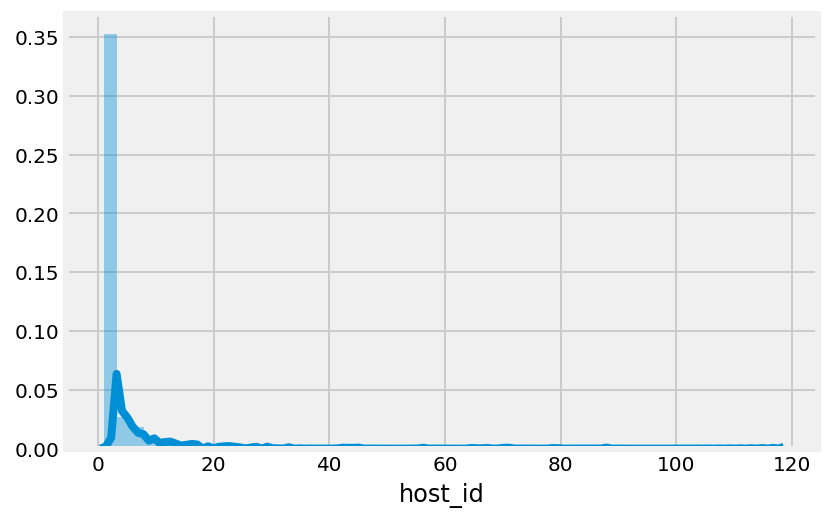

In [135]:
sns.distplot(pd.Series(active['host_id'].value_counts()))

Bulk of the listings are for renting out 1 listing, most likely for private purposes

In [141]:
active['host_id'].value_counts().value_counts()

1      877
2      228
3       83
4       56
5       36
6       27
7       19
8       17
10      12
9       10
12       9
13       8
11       6
16       6
17       5
14       4
15       4
27       3
23       3
22       3
19       2
21       2
24       2
29       2
20       1
45       1
79       1
71       1
70       1
67       1
65       1
56       1
43       1
44       1
18       1
42       1
33       1
30       1
25       1
88       1
118      1
Name: host_id, dtype: int64

In [297]:
pd.get_dummies(active[['property_type','profitability']]).corr()

,profitability,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Bungalow,property_type_Condominium,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse
profitability,1.000000,-0.014201,-0.019254,-0.015541,-0.005952,0.028164,-0.038979,-0.017925,-0.023427,0.039917,-0.011437,0.044422,-0.012345
property_type_Apartment,-0.014201,1.000000,-0.106681,-0.090140,-0.092233,-0.463402,-0.212481,-0.108468,-0.231373,-0.134040,-0.139754,-0.330913,-0.145938
property_type_Bed and breakfast,-0.019254,-0.106681,1.000000,-0.011372,-0.011636,-0.058463,-0.026807,-0.013684,-0.029190,-0.016911,-0.017632,-0.041748,-0.018412
property_type_Boutique hotel,-0.015541,-0.090140,-0.011372,1.000000,-0.009832,-0.049399,-0.022650,-0.011563,-0.024664,-0.014289,-0.014898,-0.035275,-0.015557
property_type_Bungalow,-0.005952,-0.092233,-0.011636,-0.009832,1.000000,-0.050546,-0.023176,-0.011831,-0.025237,-0.014621,-0.015244,-0.036095,-0.015918
property_type_Condominium,0.028164,-0.463402,-0.058463,-0.049399,-0.050546,1.000000,-0.116444,-0.059443,-0.126798,-0.073457,-0.076589,-0.181348,-0.079978
property_type_Hostel,-0.038979,-0.212481,-0.026807,-0.022650,-0.023176,-0.116444,1.000000,-0.027256,-0.058140,-0.033682,-0.035118,-0.083152,-0.036672
property_type_Hotel,-0.017925,-0.108468,-0.013684,-0.011563,-0.011831,-0.059443,-0.027256,1.000000,-0.029679,-0.017194,-0.017927,-0.042448,-0.018720
property_type_House,-0.023427,-0.231373,-0.029190,-0.024664,-0.025237,-0.126798,-0.058140,-0.029679,1.000000,-0.036677,-0.038240,-0.090546,-0.039932
property_type_Loft,0.039917,-0.134040,-0.016911,-0.014289,-0.014621,-0.073457,-0.033682,-0.017194,-0.036677,1.000000,-0.022153,-0.052456,-0.023134


# Setting up predictor and target variables

In [218]:
# Create separate datasets for room_types
entire = active[active['room_type'] == 'Entire home/apt']
private = active[active['room_type'] == 'Private room']
shared = active[active['room_type'] == 'Shared room']

# Remove outliers
entire = entire[entire['price'] < np.mean(entire['price']) + 2*np.std(entire['price'])]
private = private[private['price'] < np.mean(private['price']) + 2*np.std(private['price'])]
shared = shared[shared['price'] < np.mean(shared['price']) + 2*np.std(shared['price'])]

# Remove listings that are $0 price
entire = entire[entire['price'] > 0]
private = private[private['price'] > 0]
shared = shared[shared['price'] > 0]

# Concatenate all 3 sets back together
active1 = pd.concat([entire,private,shared], axis=0)

In [219]:
# Remove organizations - e.g hotel, serviced apartments, hostels

active1 = active1[(active1['property_type'] != 'Serviced apartment') & \
                  (active1['property_type'] != 'Hostel') & (active1['property_type'] != 'Hotel') & \
                 (active1['property_type'] != 'Boutique hotel')]

In [220]:
condition1 = (active1['minimum_nights'] < np.mean(active1['minimum_nights'])+2*np.std(active1['minimum_nights'])) \
            & (active1['bathrooms'] < np.mean(active1['bathrooms'])+4*np.std(active1['bathrooms']))            

In [221]:
# Set up predictor varibles without features that needs dummifying first

predictor = active1[condition1][['host_since','host_is_superhost','host_listings_count','host_identity_verified',
                    'bathrooms','beds','security_dep_required','guests_included','minimum_nights',
                    'number_of_reviews','number_of_reviews_ltm','last_rev_duration','review_scores_rating',
                    'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                    'review_scores_communication','review_scores_location','review_scores_value',
                    'review_scores_present','instant_bookable','require_guest_profile_picture',
                    'require_guest_phone_verification','reviews_per_month']]

In [222]:
# Dummify variables

predictor_dummy = pd.get_dummies(active1[condition1][['host_response_time','room_type','property_type','cancellation_policy',
                          'neighbourhood_cleansed']])

In [223]:
# Descriptive variables

    # Amenities variables 
predictor_amenities = active1[condition1].iloc[:,112:]

    # Listing Name
# predictor_name = active1[condition1]['name']

In [224]:
# Set up target variable

target = active1[condition1]['profitability']

In [225]:
# Final predictor variables with dummy

predictor = pd.concat([predictor,predictor_dummy],axis=1)

In [226]:
# Set up X and y

X = predictor
y = target

# Split into train and test set

In [227]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2889, 83) (2889,)
(510, 83) (510,)


# NLP Techniques - Listing Name

In [153]:
# # Load NLP libraries

# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction import stop_words
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize, sent_tokenize 
# from textblob import TextBlob, Word
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [154]:
# # Create function to get frequent words for CountVectorizer / TF-IDF Vectorizer

# def get_freq_words(sparse_counts, columns):
#     # X_all is a sparse matrix, so sum() returns a 'matrix' datatype ...
#     #   which we then convert into a 1-D ndarray for sorting
#     word_counts = np.asarray(sparse_counts.sum(axis=0)).reshape(-1)

#     # argsort() returns smallest first, so we reverse the result
#     largest_count_indices = word_counts.argsort()[::-1]

#     # pretty-print the results! Remember to always ask whether they make sense ...
#     freq_words = pd.Series(word_counts[largest_count_indices], 
#                            index=columns[largest_count_indices])

#     return freq_words

In [155]:
# stopwords = stop_words.ENGLISH_STOP_WORDS

In [156]:
# cvec = CountVectorizer(stop_words=stopwords, ngram_range=(1,4), min_df=80, max_df=0.4)
# cvec.fit(X_train['name'])
# df_train  = pd.DataFrame(cvec.transform(X_train['name']).todense(),
#              columns=cvec.get_feature_names())
# df_test = pd.DataFrame(cvec.transform(X_test['name']).todense(),
#              columns=cvec.get_feature_names())
# columns = np.array(cvec.get_feature_names())

In [157]:
# get_freq_words(cvec.transform(X_train['name']), columns)

In [158]:
# # Concat tokens into main df

# X_train = X_train.drop('name',axis=1)
# X_train.reset_index(drop = True, inplace = True) 
# X_train = pd.concat([X_train,df_train], axis=1)

# X_test = X_test.drop('name',axis=1)
# X_test.reset_index(drop = True, inplace = True) 
# X_test = pd.concat([X_test,df_test], axis=1)

# Standardize using Standardscaler

In [228]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


# Linear Regression

In [229]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

score_r2 = cross_val_score(lr,X_train_std,y_train,cv=5)
print('Cross_val_scores r2: ', score_r2)
print('Mean r2: ', np.mean(score_r2))
print('Standard Deviation r2: ', np.std(score_r2))
print('   ')

score_mse = cross_val_score(lr,X_train_std,y_train,cv=5,scoring='neg_mean_squared_error')
print('Cross_val_scores mae: ', score_mse)
print('Mean mse: ', np.mean(score_mse))
print('Standard Deviation mse: ', np.std(score_mse))

Cross_val_scores r2:  [-8.65317202e+24  2.93616067e-01 -6.53459876e+26  4.26447896e-01
  4.74949115e-01]
Mean r2:  -1.3242260969873685e+26
Standard Deviation r2:  2.6054018874035684e+26
   
Cross_val_scores mae:  [-1.49954637e+33 -1.12087837e+08 -9.55994353e+34 -6.17982410e+07
 -7.38080363e+07]
Mean mse:  -1.94197963338899e+34
Standard Deviation mse:  3.8094246863861336e+34


# Lasso for Feature Selection

In [230]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from math import sqrt

lassoregcv = LassoCV(normalize=False, random_state=100, max_iter=10000)
lassoregcv.fit(X_train_std, y_train)
print('best alpha: {}'.format(lassoregcv.alpha_))

lassoreg = Lasso(alpha=lassoregcv.alpha_, normalize=False, random_state=100, max_iter=10000)

score_r2 = cross_val_score(lassoreg,X_train_std,y_train,cv=5)
print('Cross_val_scores r2: ', score_r2)
print('Mean r2: ', np.mean(score_r2))
print('Standard Deviation r2: ', np.std(score_r2))
print('   ')

score_mse = cross_val_score(lassoreg,X_train_std,y_train,cv=5,scoring='neg_mean_squared_error')
print('Cross_val_scores mse: ', score_mse)
print('Mean mse: ', np.mean(score_mse))
print('Standard Deviation mae: ', np.std(score_mse))
print('Root Mean Squared Error: ',sqrt(abs(np.mean(score_mse))))

# Check coefficients of lasso model

lasso_coef = pd.DataFrame(lassoregcv.coef_,index=X_train.columns).sort_values(by=0,ascending=False)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best alpha: 142.88304288037915
Cross_val_scores r2:  [0.39679074 0.29113815 0.28625258 0.44935861 0.47027852]
Mean r2:  0.37876372065102704
Standard Deviation r2:  0.07735647669042452
   
Cross_val_scores mse:  [-1.04532794e+08 -1.12481029e+08 -1.04419342e+08 -5.93296919e+07
 -7.44645957e+07]
Mean mse:  -91045490.52221839
Standard Deviation mae:  20499109.85519383
Root Mean Squared Error:  9541.776067494897


In [231]:
lassoreg.fit(X_train_std,y_train)
y_lasso_pred = lassoreg.predict(X_test_std)

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

print(r2_score(y_test, y_lasso_pred))
print(mean_squared_error(y_test, y_lasso_pred))
print(sqrt(mean_squared_error(y_test, y_lasso_pred)))

0.5062400635708568
39855299.59234911
6313.105384226459


In [232]:
# Grid Search Lasso Regressor

from sklearn.model_selection import GridSearchCV

# Set up base estimator
lassogrid = Lasso(max_iter=5000)

# Set up gridsearch parameters
param_grid = {'alpha': np.arange(0.25,0.35,0.005)}

# Conduct gridsearch
lassogrid = GridSearchCV(lassogrid,param_grid,cv=5)
lassogrid.fit(X_train_std,y_train)

# Check best estimator & score
print(lassogrid.best_estimator_)

score_r2 = cross_val_score(lassogrid,X_train_std,y_train,cv=5)
print('Cross_val_scores r2: ', score_r2)
print('Mean r2: ', np.mean(score_r2))
print('Standard Deviation r2: ', np.std(score_r2))
print('   ')

score_mse = cross_val_score(lassogrid,X_train_std,y_train,cv=5,scoring='neg_mean_squared_error')
print('Cross_val_scores mse: ', score_mse)
print('Mean mse: ', np.mean(score_mse))
print('Standard Deviation mae: ', np.std(score_mse))
print('Root Mean Squared Error: ',sqrt(abs(np.mean(score_mse))))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

KeyboardInterrupt: 

# Recalibrate features based on Lasso results

In [233]:
# Remove features that have coefficient = 0

X_aft_lasso_train = X_train.drop(lasso_coef[lasso_coef[0] < 0.01].index, axis=1)
X_aft_lasso_test = X_test.drop(lasso_coef[lasso_coef[0] < 0.01].index, axis=1)

print(X_aft_lasso_train.shape, y_train.shape)
print(X_aft_lasso_test.shape, y_test.shape)

# Standardize data using StandardScaler

from sklearn.preprocessing import StandardScaler

ss_aft_lasso = StandardScaler()
X_aft_lasso_train_std = ss.fit_transform(X_aft_lasso_train)
X_aft_lasso_test_std = ss.transform(X_aft_lasso_test)

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

ridgeregcv = RidgeCV(normalize=False)
ridgeregcv.fit(X_aft_lasso_train_std, y_train)
print('best alpha: {}'.format(ridgeregcv.alpha_))

# Set up ridge with the best alpha

ridgereg = Ridge(alpha=ridgeregcv.alpha_, normalize=False)

score_r2 = cross_val_score(ridgereg,X_aft_lasso_train_std,y_train,cv=5)
print('Cross_val_scores r2: ', score_r2)
print('Mean r2: ', np.mean(score_r2))
print('Standard Deviation r2: ', np.std(score_r2))
print('   ')

score_mse = cross_val_score(ridgereg,X_aft_lasso_train_std,y_train,cv=5,scoring='neg_mean_squared_error')
print('Cross_val_scores mse: ', score_mse)
print('Mean mae: ', np.mean(score_mse))
print('Standard Deviation mae: ', np.std(score_mse))
print('Root Mean Squared Error: ',sqrt(abs(np.mean(score_mse))))

(2889, 22) (2889,)
(510, 22) (510,)
best alpha: 10.0
Cross_val_scores r2:  [0.39927438 0.2910629  0.27442654 0.44718109 0.48321931]
Mean r2:  0.3790328442021351
Standard Deviation r2:  0.08317440901598827
   
Cross_val_scores mse:  [-1.04102394e+08 -1.12492969e+08 -1.06149460e+08 -5.95643115e+07
 -7.26454696e+07]
Mean mae:  -90990920.79359534
Standard Deviation mae:  20919930.518491093
Root Mean Squared Error:  9538.916122578883


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [301]:
# Fit on train data to predict test data

ridgereg.fit(X_aft_lasso_train_std,y_train)
y_ridge_pred = ridgereg.predict(X_aft_lasso_test_std)

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

print(r2_score(y_test, y_ridge_pred))
print(mean_squared_error(y_test, y_ridge_pred))
print(sqrt(mean_squared_error(y_test, y_ridge_pred)))

0.4967846654685889
40618520.129957266
6373.266048891829


In [235]:
# Check coefficients of lasso model

ridge_coef = pd.DataFrame(ridgereg.coef_,index=X_aft_lasso_train.columns).sort_values(by=0,ascending=False)
ridge_coef

,0
number_of_reviews_ltm,4140.027155
minimum_nights,3116.296131
host_is_superhost,3037.103005
neighbourhood_cleansed_Museum,1873.747347
room_type_Entire home/apt,1315.010433
beds,875.057060
security_dep_required,693.762013
guests_included,677.286323
neighbourhood_cleansed_Downtown Core,559.143666
neighbourhood_cleansed_Orchard,417.285377


In [298]:
# Grid Search Ridge Regressor

from sklearn.model_selection import GridSearchCV

# Set up base estimator
ridgegrid = Ridge(max_iter=5000)

# Set up gridsearch parameters
param_grid = {'alpha': np.arange(8,15,0.5)}

# Conduct gridsearch
ridgegrid = GridSearchCV(ridgegrid,param_grid,cv=5)
ridgegrid.fit(X_aft_lasso_train_std,y_train)

# Check best estimator & score
print(ridgegrid.best_estimator_)

score_r2 = cross_val_score(ridgegrid,X_aft_lasso_train_std,y_train,cv=5)
print('Cross_val_scores r2: ', score_r2)
print('Mean r2: ', np.mean(score_r2))
print('Standard Deviation r2: ', np.std(score_r2))
print('   ')

score_mse = cross_val_score(ridgegrid,X_aft_lasso_train_std,y_train,cv=5,scoring='neg_mean_squared_error')
print('Cross_val_scores mse: ', score_mse)
print('Mean mse: ', np.mean(score_mse))
print('Standard Deviation mae: ', np.std(score_mse))
print('Root Mean Squared Error: ',sqrt(abs(np.mean(score_mse))))

Ridge(alpha=14.5, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Cross_val_scores r2:  [0.39911386 0.291032   0.27503397 0.4470737  0.48326858]
Mean r2:  0.3791044238970456
Standard Deviation r2:  0.08301539781557245
   
Cross_val_scores mse:  [-1.04130211e+08 -1.12497872e+08 -1.06060594e+08 -5.95758821e+07
 -7.26385433e+07]
Mean mse:  -90980620.53227364
Standard Deviation mae:  20909322.48372532
Root Mean Squared Error:  9538.376199976265


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


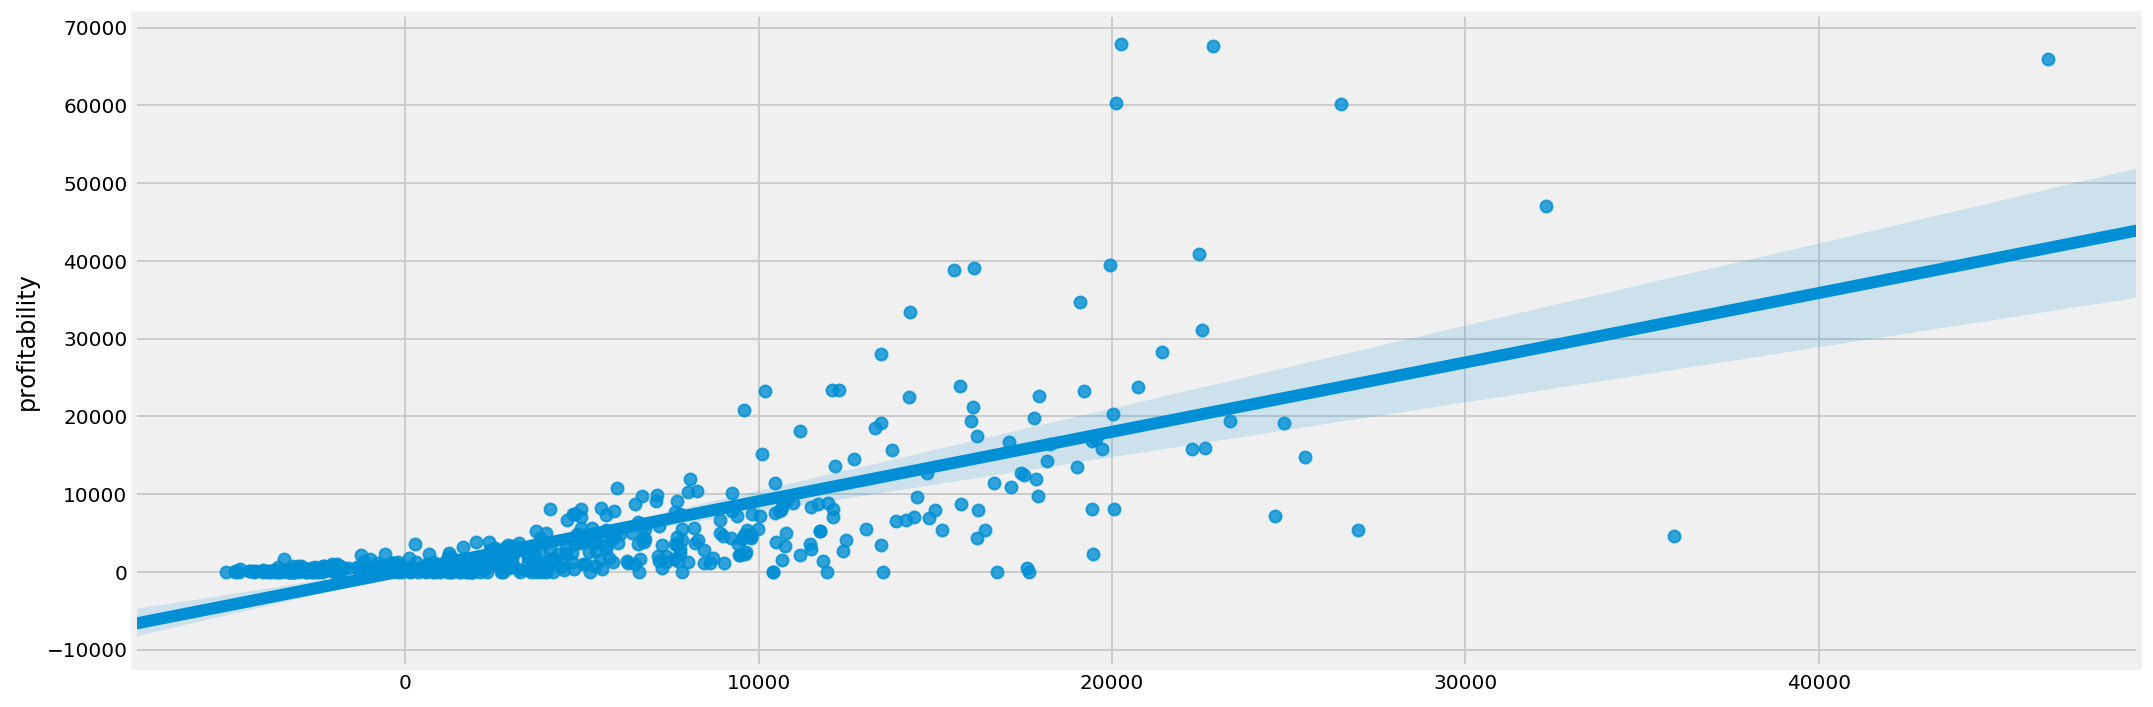

In [302]:
# Visualize y_pred vs actual values

plt.figure(figsize=(16, 6))
sns.regplot(x=y_ridge_pred,y=y_test)

In [315]:
pred_actual = pd.DataFrame([y_rf_pred,y_test],columns=y_test.index, index=['Predicted','Actual']).T

pred_actual['Difference'] = pred_actual['Actual'] - pred_actual['Predicted']

pred_actual = pd.concat([pred_actual,active],axis=1,join='inner')

In [311]:
lasso_coef

,0
number_of_reviews_ltm,3933.595768
minimum_nights,3041.148663
host_is_superhost,2986.845391
neighbourhood_cleansed_Museum,1720.346047
beds,759.777030
guests_included,614.345564
security_dep_required,587.197037
room_type_Entire home/apt,450.271194
neighbourhood_cleansed_Downtown Core,370.647234
number_of_reviews,368.035817


In [316]:
pred_actual.sort_values(by='Difference',ascending=True)[['Predicted','Actual','Difference','listing_url','property_type','room_type','neighbourhood_cleansed','host_since','host_is_superhost','host_listings_count',
                    'bathrooms','beds','security_dep_required','guests_included','minimum_nights',
                    'number_of_reviews','number_of_reviews_ltm','last_rev_duration','review_scores_rating','review_scores_value']]

,Predicted,Actual,Difference,listing_url,property_type,room_type,neighbourhood_cleansed,host_since,host_is_superhost,host_listings_count,bathrooms,beds,security_dep_required,guests_included,minimum_nights,number_of_reviews,number_of_reviews_ltm,last_rev_duration,review_scores_rating,review_scores_value
5188,33454.954,19395.96,-14058.994,https://www.airbnb.com/rooms/27462710,Apartment,Entire home/apt,Kallang,1,1,4,2.0,2.0,0,4,1,57,57,0.0,96.0,9.0
903,18450.778,4832.70,-13618.078,https://www.airbnb.com/rooms/8156821,Other,Private room,Novena,6,1,2,1.0,1.0,1,1,3,25,10,5.0,94.0,10.0
7157,17629.581,4669.80,-12959.781,https://www.airbnb.com/rooms/32273714,Condominium,Entire home/apt,Museum,4,1,15,2.0,4.0,1,5,15,1,1,0.0,100.0,10.0
1987,26935.334,15985.92,-10949.414,https://www.airbnb.com/rooms/14600122,Condominium,Entire home/apt,Marine Parade,5,1,9,1.0,3.0,1,4,1,93,48,0.0,97.0,9.0
2791,29272.800,19422.00,-9850.800,https://www.airbnb.com/rooms/18131601,Apartment,Entire home/apt,River Valley,6,0,47,2.0,4.0,1,6,2,79,39,0.0,89.0,9.0
3688,14869.150,6516.00,-8353.150,https://www.airbnb.com/rooms/21608069,Condominium,Private room,Clementi,4,1,2,1.0,2.0,1,2,15,10,4,0.0,96.0,9.0
269,26925.000,19110.00,-7815.000,https://www.airbnb.com/rooms/3925851,Condominium,Entire home/apt,Rochor,6,0,4,2.0,4.0,1,4,2,63,39,1.0,95.0,9.0
1624,22492.508,14769.60,-7722.908,https://www.airbnb.com/rooms/12536372,Loft,Entire home/apt,Rochor,5,1,16,1.0,2.0,1,1,1,217,60,0.0,97.0,9.0
4044,10091.900,4000.00,-6091.900,https://www.airbnb.com/rooms/22937932,Apartment,Entire home/apt,Kallang,2,0,11,1.0,2.0,1,2,10,11,5,0.0,93.0,9.0
566,37036.220,31059.60,-5976.620,https://www.airbnb.com/rooms/6100964,Apartment,Entire home/apt,Orchard,4,1,1,1.0,1.0,1,2,2,109,39,0.0,95.0,9.0


In [319]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=100)
rfr.fit(X_train_std, y_train)
y_rf_pred = rfr.predict(X_test_std)

print(r2_score(y_test, y_rf_pred))
print(mean_squared_error(y_test, y_rf_pred))
print(sqrt(mean_squared_error(y_test, y_rf_pred)))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8425636466816773
12707942.798289636
3564.8201635271357


In [314]:
pd.DataFrame(rfr.feature_importances_,X_train.columns).sort_values(by=0,ascending=False)

,0
number_of_reviews_ltm,3.111792e-01
minimum_nights,1.858181e-01
host_is_superhost,1.717048e-01
neighbourhood_cleansed_Museum,8.288721e-02
guests_included,3.653227e-02
number_of_reviews,3.485688e-02
room_type_Entire home/apt,3.138969e-02
last_rev_duration,1.562058e-02
beds,1.420760e-02
host_since,1.244636e-02


In [261]:
# Grid Search Ridge Regressor

from sklearn.model_selection import GridSearchCV

# Set up base estimator
rfrgrid = RandomForestRegressor()

# Set up gridsearch parameters
param_grid = {'n_estimators': [200],
            'max_depth': [10,15,20,25],
             'min_samples_split': [2,5,10]}

# Conduct gridsearch
rfrgrid = GridSearchCV(rfrgrid,param_grid,cv=5)
rfrgrid.fit(X_train_std,y_train)

# Check score of model
score_r2 = cross_val_score(rfrgrid,X_train_std,y_train,cv=5)
print('Cross_val_scores r2: ', score_r2)
print('Mean r2: ', np.mean(score_r2))
print('Standard Deviation r2: ', np.std(score_r2))
print('   ')

score_mse = cross_val_score(rfrgrid,X_train_std,y_train,cv=5,scoring='neg_mean_squared_error')
print('Cross_val_scores mse: ', score_mse)
print('Mean mse: ', np.mean(score_mse))
print('Standard Deviation mae: ', np.std(score_mse))
print('Root Mean Squared Error: ',sqrt(abs(np.mean(score_mse))))

Cross_val_scores r2:  [0.81133383 0.78243521 0.77844528 0.81060918 0.77447079]
Mean r2:  0.7914588588632769
Standard Deviation r2:  0.016131479696139806
   
Cross_val_scores mse:  [-1239.17812489 -1629.18030394 -1641.10233695 -1447.72154762
 -1893.52088048]
Mean mse:  -1570.140638775733
Standard Deviation mae:  217.9993783801846
Root Mean Squared Error:  39.62500017382628


In [ ]:
# 1st try best estimator
rfrgrid = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=705, verbose=0, warm_start=False)

In [262]:
# Check best estimator from gridsearch

rfrgrid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [318]:
# Run model after gridsearch

rfrgrid = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

rfrgrid.fit(X_train_std, y_train)
y_rf_grid_pred = rfrgrid.predict(X_test_std)

print(r2_score(y_test, y_rf_grid_pred))
print(mean_squared_error(y_test, y_rf_grid_pred))
print(sqrt(mean_squared_error(y_test, y_rf_grid_pred)))

0.845599135390099
12462924.312670356
3530.286718195897


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


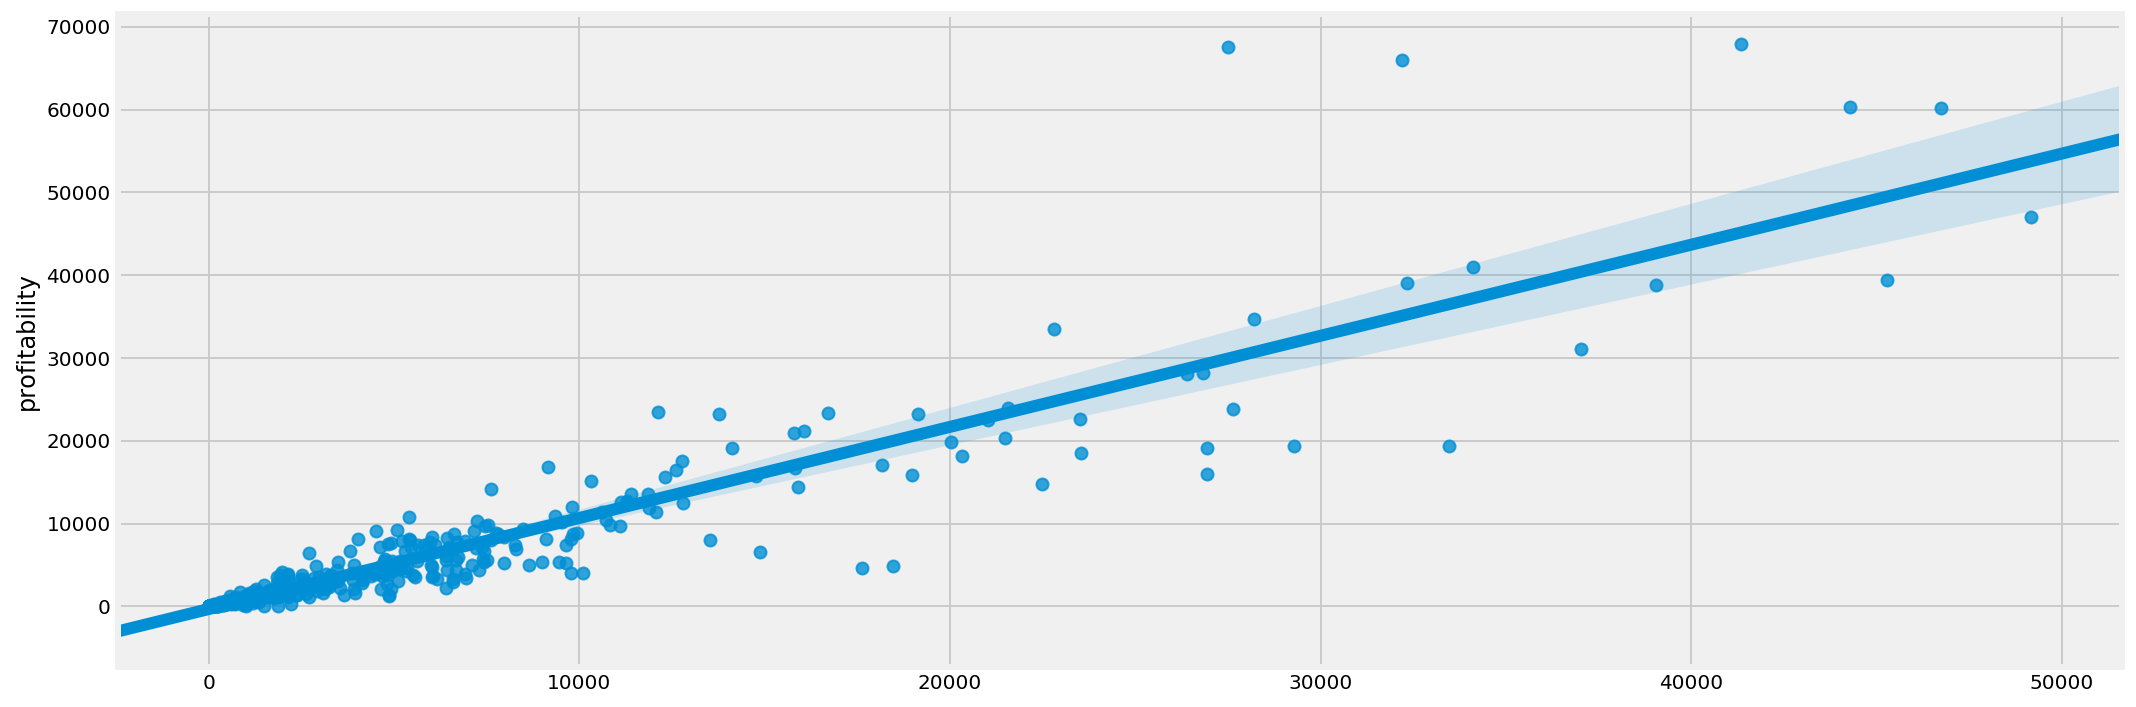

In [320]:
# Visualize y_pred vs actual values

plt.figure(figsize=(16, 6))
sns.regplot(x=y_rf_pred,y=y_test)

# XGBoost Regressor

In [306]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(random_state=0)

score_r2 = cross_val_score(xg_reg,X_train_std,y_train,cv=5)
print('Cross_val_scores r2: ', score_r2)
print('Mean r2: ', np.mean(score_r2))
print('Standard Deviation r2: ', np.std(score_r2))
print('   ')

score_mse = cross_val_score(xg_reg,X_train_std,y_train,cv=5,scoring='neg_mean_squared_error')
print('Cross_val_scores mse: ', score_mse)
print('Mean mse: ', np.mean(score_mse))
print('Standard Deviation mae: ', np.std(score_mse))
print('Root Mean Squared Error: ',sqrt(abs(np.mean(score_mse))))

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Cross_val_scores r2:  [0.81530399 0.6469871  0.69409287 0.74234135 0.70837038]
Mean r2:  0.7214191378018819
Standard Deviation r2:  0.0560521682001701
   


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Cross_val_scores mse:  [-32006786.00192825 -56015503.74900205 -44753397.12524262
 -27761822.40413508 -40995282.9168392 ]
Mean mse:  -40306558.43942944
Standard Deviation mae:  9932535.45830156
Root Mean Squared Error:  6348.744634920312


In [321]:
xg_reg.fit(X_train_std,y_train)
y_xgb_pred = xg_reg.predict(X_test_std)

print(r2_score(y_test, y_xgb_pred))
print(mean_squared_error(y_test, y_xgb_pred))
print(sqrt(mean_squared_error(y_test, y_xgb_pred)))

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.7948813073661835
16556764.41882581
4069.0004201063693


### GridSearch XGBoost Regressor

In [275]:
# Grid Search Ridge Regressor

from sklearn.model_selection import GridSearchCV

# Set up base estimator
xg_reggrid = xgb.XGBRegressor(random_state=0)

# Set up gridsearch parameters
param_grid = {'max_depth': [3,10,15],
             'gamma': [0,0.1,0.2]}

# Conduct gridsearch
xg_reggrid = GridSearchCV(xg_reggrid,param_grid,cv=5)
xg_reggrid.fit(X_train_std,y_train)

# Check best estimator & score
print(xg_reggrid.best_estimator_)

score_r2 = cross_val_score(xg_reggrid,X_train_std,y_train,cv=5)
print('Cross_val_scores r2: ', score_r2)
print('Mean r2: ', np.mean(score_r2))
print('Standard Deviation r2: ', np.std(score_r2))
print('   ')

score_mse = cross_val_score(xg_reggrid,X_train_std,y_train,cv=5,scoring='neg_mean_squared_error')
print('Cross_val_scores mse: ', score_mse)
print('Mean mse: ', np.mean(score_mse))
print('Standard Deviation mae: ', np.std(score_mse))
print('Root Mean Squared Error: ',sqrt(abs(np.mean(score_mse))))

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

Cross_val_scores r2:  [0.79856674 0.7812705  0.77653403 0.80242869 0.75574832]
Mean r2:  0.7829096549442355
Standard Deviation r2:  0.016776234216611702
   


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

Cross_val_scores mse:  [-1333.15025471 -1630.80700342 -1653.53455733 -1519.58198787
 -2037.32358124]
Mean mse:  -1634.879476913022
Standard Deviation mae:  230.93717270580402
Root Mean Squared Error:  40.433642884521575


# Ensemble

In [322]:
ensemble = pd.DataFrame([y_lasso_pred,y_ridge_pred,y_rf_pred, y_xgb_pred], index=['Lasso','Ridge','RandomForest','XGBoost']).T
ensemble['Ave'] = (ensemble['Lasso'] + ensemble['Ridge'] + ensemble['RandomForest'] + ensemble['XGBoost'])/4

In [323]:
# Check score of ensemble method

print('R2 score', r2_score(y_test, ensemble['Ave']))
print('MSE', mean_squared_error(y_test, ensemble['Ave']))
print('RMSE', sqrt(mean_squared_error(y_test, ensemble['Ave'])))

R2 score 0.74282287409394
MSE 20758815.45880791
RMSE 4556.184309134993


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


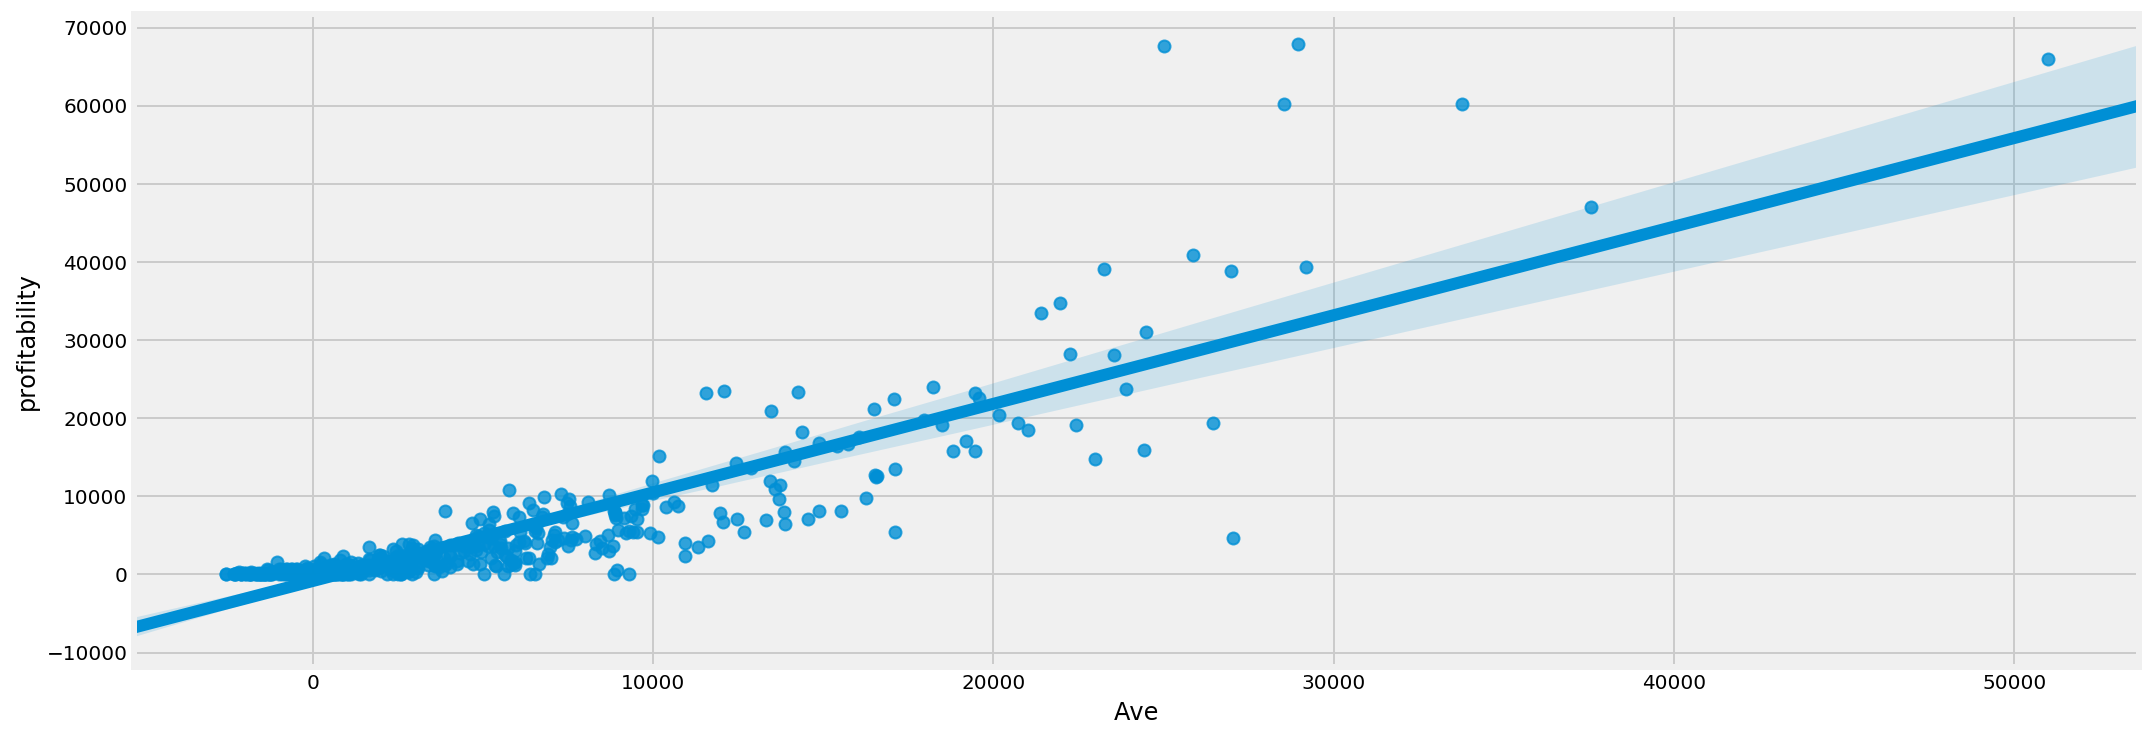

In [324]:
# Visualize y_pred vs actual values

plt.figure(figsize=(16, 6))
sns.regplot(x=ensemble['Ave'],y=y_test)